In [1]:
import numpy
import gzip
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
import warnings
import shutil
import xarray
from datetime import date
warnings.filterwarnings('ignore')
import pycountry
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua4 as eua
import numba
import copy
import glob
from numba import njit
import pandas
import glob
import psutil
import json
import requests

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def datetime_to_seconds(dates, ref='1900-01-01T00:00:00'):
    """ from datetime64 to seconds since 1900-01-01 00:00:00"""
    return ((dates - np.datetime64(ref)) / np.timedelta64(1, 's')).astype(np.int64)

def seconds_to_datetime(seconds, ref='1900-01-01'):
    """ from seconds to datetime64 """
    seconds = np.asarray(seconds)
    return pd.to_datetime(seconds, unit='s', origin=ref)

import matplotlib
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (20, 10)
font = {'family' : 'normal',
    # 'weight' : 'bold',
    'size'   : 22}
matplotlib.rc('font', **font)

In [2]:
with open('/users/staff/uvoggenberger/scratch/hug/config_v9/active.json') as json_file:
    active_v9 = json.load(json_file)
with open('/users/staff/uvoggenberger/scratch/hug/config_v11/active.json') as json_file:
    active_v11 = json.load(json_file)

In [3]:
rq = {'variable': ['air_temperature'], 'date': '20060701-20060701', 'format': 'nc'} 
# 0-20999-0-ZEKG 'date': '19901201-19901201', 'statid': ['0-20999-0-ZSAF','0-20999-0-TTCC'], 'optional': ['wind_bias_estimate',], 'plev':70000, 

In [ ]:
df_v9 = eua.vm_request_wrapper(rq , overwrite=True, vm_url='http://127.0.0.1:8009')
len(df_v9)

In [ ]:
df_v9 = eua.vm_request_wrapper(rq , overwrite=True, vm_url='http://127.0.0.1:8009')
len(df_v9)

In [28]:
testlist = list(df_v9.keys())
out = []
for i in df_v11:
    if ~np.isin(i, testlist):
        out.append(i)
        # display(df_v11[i])
        # display(df_v11[i].to_dataframe())
out

,RAOBCORE_bias_estimate,RASE_bias_estimate,RICH_bias_estimate,RISE_bias_estimate,lat,lon,obs,plev,report_id,station_id,ta,time
0,NaN,NaN,NaN,NaN,48.248871,16.35759,0,380.0,100000000118586,WIEN/HOHE WARTE (11035-1),231.889999,2022-12-31 11:30:23
1,NaN,NaN,NaN,NaN,48.248871,16.35759,0,390.0,100000000118586,WIEN/HOHE WARTE (11035-1),231.759995,2022-12-31 11:30:23
2,NaN,NaN,NaN,NaN,48.248871,16.35759,0,400.0,100000000118586,WIEN/HOHE WARTE (11035-1),232.369995,2022-12-31 11:30:23
3,NaN,NaN,NaN,NaN,48.248871,16.35759,0,410.0,100000000118586,WIEN/HOHE WARTE (11035-1),232.880005,2022-12-31 11:30:23
4,NaN,NaN,NaN,NaN,48.248871,16.35759,0,420.0,100000000118586,WIEN/HOHE WARTE (11035-1),232.059998,2022-12-31 11:30:23
...,...,...,...,...,...,...,...,...,...,...,...,...
2528,0.498339,NaN,0.498339,NaN,48.248871,16.35759,0,99440.0,100000000118586,WIEN/HOHE WARTE (11035-1),279.660004,2022-12-31 11:30:23
2529,0.500930,NaN,0.500930,NaN,48.248871,16.35759,0,99470.0,100000000118586,WIEN/HOHE WARTE (11035-1),279.799988,2022-12-31 11:30:23
2530,0.506114,NaN,0.506114,NaN,48.248871,16.35759,0,99530.0,100000000118586,WIEN/HOHE WARTE (11035-1),279.920013,2022-12-31 11:30:23
2531,0.506978,NaN,0.506978,NaN,48.248871,16.35759,0,99540.0,100000000118586,WIEN/HOHE WARTE (11035-1),280.049988,2022-12-31 11:30:23


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


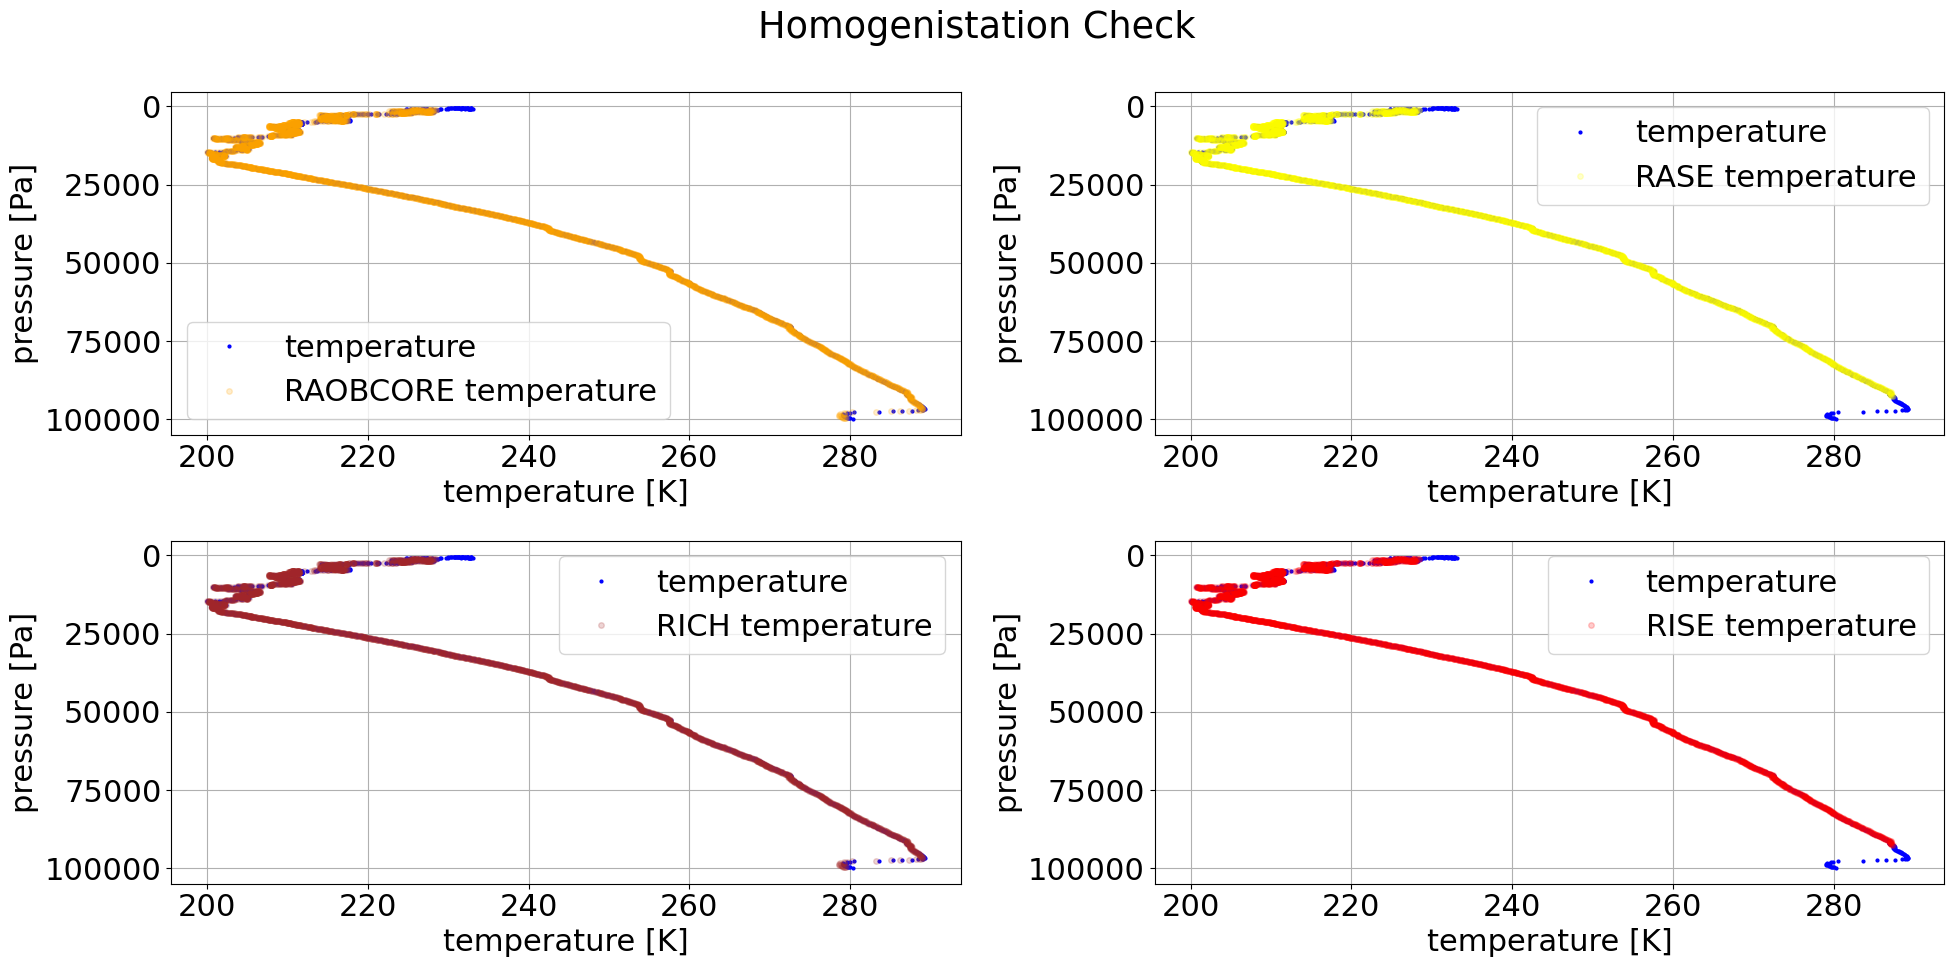

In [4]:
rq = {'variable': ['air_temperature'], 'statid': '11035', 'date': '20221231-20221231','optional': ['RAOBCORE_bias_estimate', 'RISE_bias_estimate', 'RASE_bias_estimate', 'RICH_bias_estimate',], 'format': 'nc'} # 0-20999-0-ZEKG
df = eua.vm_request_wrapper(rq , overwrite=True )# , vm_url='http://127.0.0.1:8009')

df = df.to_dataframe()
display(df)
# del df

fig, axs = plt.subplots(2,2)
fig.suptitle('Homogenistation Check')

axs[0][0].plot(df.ta, df.plev, 'o', color = 'blue', markersize = 2, alpha = 1, label='temperature')
axs[0][0].plot((df.ta - df.RAOBCORE_bias_estimate), df.plev, 'o', color = 'orange',markersize = 4, alpha = 0.2, label='RAOBCORE temperature')

axs[0][1].plot(df.ta, df.plev, 'o', color = 'blue', markersize = 2, alpha = 1, label='temperature')
axs[0][1].plot((df.ta - df.RASE_bias_estimate), df.plev, 'o', color = 'yellow',markersize = 4, alpha = 0.2, label='RASE temperature')

axs[1][0].plot(df.ta, df.plev, 'o', color = 'blue', markersize = 2, alpha = 1, label='temperature')
axs[1][0].plot((df.ta - df.RICH_bias_estimate), df.plev, 'o', color = 'brown',markersize = 4, alpha = 0.2, label='RICH temperature')

axs[1][1].plot(df.ta, df.plev, 'o', color = 'blue', markersize = 2, alpha = 1, label='temperature')
axs[1][1].plot((df.ta - df.RISE_bias_estimate), df.plev, 'o', color = 'red',markersize = 4, alpha = 0.2, label='RISE temperature')

for ax in axs.flat:
    ax.set(xlabel='temperature [K]', ylabel='pressure [Pa]', ylim=ax.get_ylim()[::-1])
    ax.set_title(None)
    ax.grid()
    ax.legend()

fig.tight_layout()
fig.show()


In [38]:
with eua.CDMDataset(glob.glob('/mnt/users/scratch/leo/scratch/converted_v11/long/*' + '0-20999-0-ZEKG' + '*.nc')[0]) as hfile:
    display(hfile)
    display(hfile['header_table']['report_timestamp'])
    display(hfile['observations_table']['date_time'][:])
    display(hfile['observations_table']['observed_variable'][:])
    display(hfile['observations_table']['z_coordinate'][:])

File: <HDF5 file "0-20999-0-ZEKG_CEUAS_merged_v1.nc" (mode r)>
Filesize: 1.36 MB
Filename: /mnt/users/scratch/leo/scratch/converted_v11/long/0-20999-0-ZEKG_CEUAS_merged_v1.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 5
 - G | era5fb_______________________________________ : : 70
 - G | header_table_________________________________ : : 55
 - G | observations_table___________________________ : : 51
 - G | observed_variable____________________________ : : 10
 - G | recordindices________________________________ : : 6
 - G | sensor_configuration_________________________ : : 13
 - G | source_configuration_________________________ : : 3
 - G | station_configuration________________________ : : 39
 - G | station_configuration_codes__________________ : : 8
 - G | station_type_________________________________ : : 5
 - G | units________________________________________ : : 7
 - G | z_coordinate_type____________________________ : : 5

report_timestamp : (1,)

array([2107641600, 2107641600, 2107641600, 2107641600])

array([ 39, 126, 137, 138])

array([30000., 30000., 30000., 30000.], dtype=float32)

In [12]:
statid = '06610'
dt_from = datetime_to_seconds(np.datetime64('2019-01-01'))
dt_to = datetime_to_seconds(np.datetime64('2019-12-31'))

conv_file = glob.glob('/mnt/users/scratch/leo/scratch/converted_v11/long/*'+statid+'*')[0]
with h5py.File(conv_file, 'r') as file:
    print(file['station_configuration']['primary_id'][0])

In [6]:
statid = '06610'

file = glob.glob('/mnt/users/scratch/leo/scratch/converted_v11/long/*'+statid+'*')[0]
with eua.CDMDataset(file) as data:
    sid = data.to_dataframe(groups='sensor_configuration', variables=['sensor_id', 'comments'])
sid

,sensor_id,comments
0,???,??? Unknown instrument category because data...
1,AA3,AA3 Australia Astor 72 MHz thermistor in S-s...
2,AA4,AA4 Australia Astor 72 MHz external thermist...
3,AA5,AA5 Australia Astor 403 MHz thermistor in du...
4,AA6,AA6 Australia Astor Type 403 (402 MHz) exter...
...,...,...
3290,APA3,APA3 exact type insufficiently documented
3291,A??,A?? exact type insufficiently documented
3292,A???,A??? exact type insufficiently documented
3293,C[,C[ exact type insufficiently documented


In [7]:
conv_file = glob.glob('/mnt/users/scratch/leo/scratch/converted_v11/long//0-20001-0-11035_CEUAS_merged_v1.nc')[0]
dt_from = datetime_to_seconds(np.datetime64('1970-01-01'))
dt_to = datetime_to_seconds(np.datetime64('1970-01-02'))
      
df_dict = {}
h_df_dict = {}
    
with h5py.File(conv_file, 'r') as file:
    rts = file['recordindices']['recordtimestamp'][:]
    idx = np.where(np.logical_and((rts >= dt_from), (rts <= dt_to)))[0]
    plevs = [1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]

    
    idx_d = {}
    var_d = {'air_temperature':'126', 'relative_humidty':'138', 'geopotential':'117', 'eastward_wind_speed':'139', 'northward_wind_speed':'140', 'dew_point': '137', 'specific_humidity':'39'}
    for i in var_d:
        idx_d[i] = file['recordindices'][var_d[i]][idx]
    
    masks = {}
    for i in idx_d:
        masks[i] = file['observations_table']['z_coordinate'][idx_d[i][0]:idx_d[i][-1]]
        masks[i] = np.isin(masks[i],plevs)
        # masks[i] = np.isfinite(masks[i])
        
    mask = masks['air_temperature']
    t_idx = idx_d['air_temperature']
    df_dict['z_coordinate'] = list(file['observations_table']['z_coordinate'][t_idx[0]:t_idx[-1]][mask])
    df_dict['date_time'] = seconds_to_datetime(list(file['observations_table']['date_time'][t_idx[0]:t_idx[-1]][mask]))
    df_dict['latitude'] = list(file['observations_table']['latitude'][t_idx[0]:t_idx[-1]][mask])
    df_dict['longitude'] = list(file['observations_table']['longitude'][t_idx[0]:t_idx[-1]][mask])
    repid = np.asarray(file['observations_table']['report_id'][t_idx[0]:t_idx[-1]][mask])
    df_dict['report_id'] = list(repid.view('|S{}'.format(repid.shape[1])).flatten().astype(str))
    # df_dict['RASE_bias_estimate'] = list(file['advanced_homogenisation']['RASE_bias_estimate'][t_idx[0]:t_idx[-1]][mask])
    # df_dict['latitude_displacement'] = list(file['advanced_homogenisation']['latitude_displacement'][t_idx[0]:t_idx[-1]][mask])
    # df_dict['longitude_displacement'] = list(file['advanced_homogenisation']['longitude_displacement'][t_idx[0]:t_idx[-1]][mask])
    # df_dict['time_since_launch'] = list(file['advanced_homogenisation']['time_since_launch'][t_idx[0]:t_idx[-1]][mask])
    df_dict['air_temperature'] = list(file['observations_table']['observation_value'][t_idx[0]:t_idx[-1]][mask])
    
    df_dict_d = {}
    for i in masks:
        if i != 'air_temperature':
            df_dict_d[i] = {}
    for i in masks:
        if i != 'air_temperature':
            df_dict_d[i]['z_coordinate'] = list(file['observations_table']['z_coordinate'][idx_d[i][0]:idx_d[i][-1]][masks[i]])
            df_dict_d[i]['date_time'] = seconds_to_datetime(list(file['observations_table']['date_time'][idx_d[i][0]:idx_d[i][-1]][masks[i]]))
            df_dict_d[i][i] = list(file['observations_table']['observation_value'][idx_d[i][0]:idx_d[i][-1]][masks[i]])


    # df_dict['date_time'] = seconds_to_datetime(df_dict['date_time'])
    df = pd.DataFrame.from_dict(df_dict)

    # h_df_dict['date_time'] = seconds_to_datetime(h_df_dict['date_time'])
    h_df = pd.DataFrame.from_dict(h_df_dict)

    # put dfs together:
    for i in df_dict_d:
        if i != 'air_temperature':
            df = df.merge(pd.DataFrame.from_dict(df_dict_d[i]), how='left', on=['date_time','z_coordinate'])
df

,z_coordinate,date_time,latitude,longitude,report_id,air_temperature,relative_humidty,geopotential,eastward_wind_speed,northward_wind_speed,dew_point,specific_humidity
0,1000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,226.500000,NaN,295950.0,47.454479,17.272017,NaN,NaN
1,2000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,212.300003,NaN,252420.0,43.134579,7.605790,NaN,NaN
2,3000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,209.300003,NaN,227790.0,31.799999,0.000000,NaN,NaN
3,5000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,210.899994,NaN,197090.0,21.816664,1.908711,NaN,NaN
4,7000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,213.500000,NaN,176620.0,15.600000,0.000000,NaN,NaN
5,10000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,213.899994,NaN,154740.0,7.051259,1.889379,NaN,NaN
6,15000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,247.100006,NaN,129550.0,14.870597,2.622087,273.299988,NaN
7,20000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,216.699997,NaN,111490.0,10.341600,8.677632,NaN,NaN
8,30000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,217.500000,NaN,86110.0,16.712479,19.917156,NaN,NaN
9,40000.0,1970-01-01 00:00:00,48.25,16.370001,200000000030705,231.699997,NaN,67670.0,15.350000,26.586981,NaN,NaN
